In [1]:
from tensorflow import keras

# Fashion MNIST 데이터셋

케라스에 빌트인 되어 있는 Fashion MNIST 데이터를 불러오겠습니다.

**Fashion MNIST** 데이터 셋은 우리가 잘 알고 있는 숫자 손글씨 이미지 데이터 셋인 MNIST와 유사한 형태를 지녔는데요.

이름에서 알 수 있는 것처럼 패션 의류 제품 이미지를 10개의 항목으로 분류해 놓았습니다.
MNIST 데이터셋 이 신경망을 배울 때 사용하는 대표적인 예제로 과다하게 많이 사용되다 보니

보다 다양한 형태의 학습에 사용하기 위해서 유럽의 전자 상거래 회사인 [Zalando](https://www.zalando.com/)의 연구소에서 제공한 이미지 데이터 셋입니다.

Zalando Research의 Github Repo에 있는 데이터를 참고하시면 좋을 것 같습니다 (https://github.com/zalandoresearch/fashion-mnist)

Fashion-MNIST는 총 70,000개의 이미지로 60,000개의 training data 세트와 10,000 개의 test data 세트로 구성되어 있습니다.

각 이미지는 width와 height가 28 $\times$ 28개의 픽셀로 이루어진 낮은 해상도의 회색조 이미지입니다.

각 픽셀은 0(검은색)부터 255(흰색) 사이의 값을 가집니다.

(MNIST 데이터와 동일한 이미지 수, 동일한 해상도입니다!)



10개의 제품 분류는 다음과 같습니다.

**레이블 설명**

* 0 티셔츠/탑
* 1 바지
* 2 풀오버(스웨터의 일종)
* 3 드레스
* 4 코트
* 5 샌들
* 6 셔츠
* 7 스니커즈
* 8 가방
* 9 앵클 부츠

In [2]:
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


첫번째 훈련 데이터입니다.  
MNIST처럼 28 × 28 행렬이고 원소는 0부터 255까지의 정수이며 픽셀의 밝기를 나타냅니다.  
신발처럼 보이네요.

In [3]:
import numpy as np
np.set_printoptions(linewidth=200,threshold=1000)

print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 22

`plt.imshow`를 사용해서 이미지로 보죠.

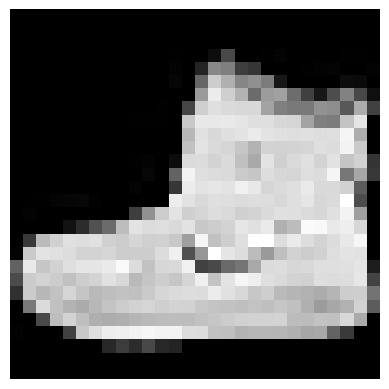

In [4]:
import matplotlib.pyplot as plt

plt.axis("off")
plt.imshow(train_images[0], cmap=plt.cm.gray)
plt.show()

라벨입니다.

In [5]:
print(train_labels[0])

9


0부터 9까지의 라벨은 다음과 같은 패션 아이템과 대응합니다.

In [6]:
class_names=['Tshirt/top','Troser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

shape은 MNIST와 동일하네요.

In [7]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


훈련 데이터의 앞 25장을 5$\times$5 모아찍기로 출력해 보겠습니다.

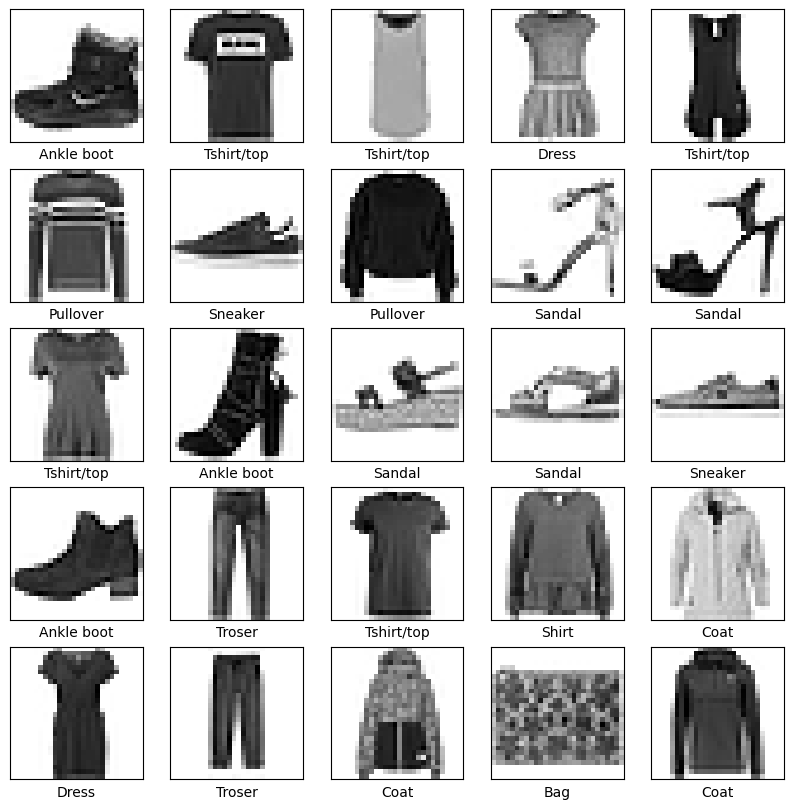

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

학습을 위해 각 데이터를 flatten하고  0과 1 사이로 리스케일링 해줍시다.

In [9]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images / 255

MNIST에서 구성했던 신경망으로 학습해 보죠.  
Fashion MNIST는 MNIST만큼 기하적으로 단순하고 분명한 구조가 아닌지라 MNIST에 비해선 정확도가 많이 떨어지지만 이정도면 나쁘지는 않은 정확도입니다.

In [10]:
from keras import layers

model = keras.Sequential([
    layers.Dense(512, input_shape=(784,), activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="RMSprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.fit(train_images, train_labels, epochs=5, batch_size=128)

test_loss, test_acc = model.evaluate(test_images, test_labels)

print("\n")
print(f"test_acc: {test_acc}")

/Users/vin_ah/miniconda3/envs/new_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7464 - loss: 0.7309
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8525 - loss: 0.3979
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8740 - loss: 0.3428
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8852 - loss: 0.3094
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8902 - loss: 0.2949
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - accuracy: 0.8623 - loss: 0.3761


test_acc: 0.8636999726295471


첫번째 등장하는 테스트 이미지를 9(Ankle Boot)라고 대답했는데 맞았네요.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step
[2.4130637e-07 2.5964608e-08 1.7596663e-07 9.7337434e-08 3.5372366e-08 1.1405031e-02 1.6110259e-07 2.4883039e-03 4.3732706e-07 9.8610544e-01]


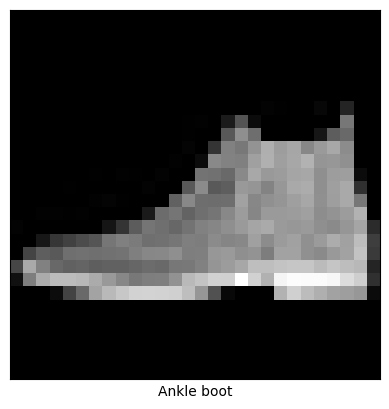

In [11]:
predictions = model.predict(test_images)
print(predictions[0])

plt.imshow(test_images[0].reshape(28,28), cmap=plt.cm.gray)
plt.xticks([])
plt.yticks([])
plt.xlabel(class_names[test_labels[0]])
plt.show()

confusion matrix입니다.

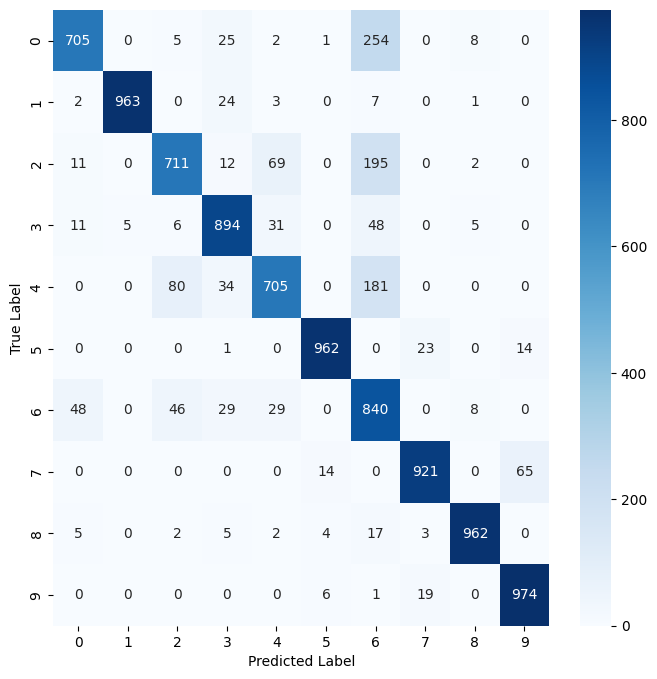

              precision    recall  f1-score   support

           0       0.90      0.70      0.79      1000
           1       0.99      0.96      0.98      1000
           2       0.84      0.71      0.77      1000
           3       0.87      0.89      0.88      1000
           4       0.84      0.70      0.77      1000
           5       0.97      0.96      0.97      1000
           6       0.54      0.84      0.66      1000
           7       0.95      0.92      0.94      1000
           8       0.98      0.96      0.97      1000
           9       0.92      0.97      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.88      0.86      0.87     10000
weighted avg       0.88      0.86      0.87     10000



In [12]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

plt.figure(figsize=(8,8))
confusion = confusion_matrix(test_labels, np.argmax(predictions, axis=1))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print(classification_report(test_labels, np.argmax(predictions, axis=1)))

**[과제1] 각 라벨에 대하여 클래스 이름, Precision, Recall, F1-score가 순서로 출력되도록 바닐라 파이썬과 numpy만을 사용하여 코드를 작성하시오. 위 싸이킷런으로 출력한 결과와 비교하시오.**

In [14]:
for i in range(10):
	precision = confusion[i, i]/np.sum(confusion[:, i])
	recall = confusion[i, i]/np.sum(confusion[i, :])
	f1_score = 2*(precision*recall) / (precision+recall)
	print(f'{class_names[i]} : {round(precision, 2)}, {round(recall, 2)}, {round(f1_score, 2)}')

Tshirt/top : 0.9, 0.7, 0.79
Troser : 0.99, 0.96, 0.98
Pullover : 0.84, 0.71, 0.77
Dress : 0.87, 0.89, 0.88
Coat : 0.84, 0.7, 0.77
Sandal : 0.97, 0.96, 0.97
Shirt : 0.54, 0.84, 0.66
Sneaker : 0.95, 0.92, 0.94
Bag : 0.98, 0.96, 0.97
Ankle boot : 0.92, 0.97, 0.95


**[과제2] 다음과 같이 틀린 조합이 더 밝게 표시되도록 시각화 하시오.**  
![](https://drive.google.com/thumbnail?id=1mCEqCOklBAhVxpnttJmpvmxvggt7kPtQ&sz=s4000)

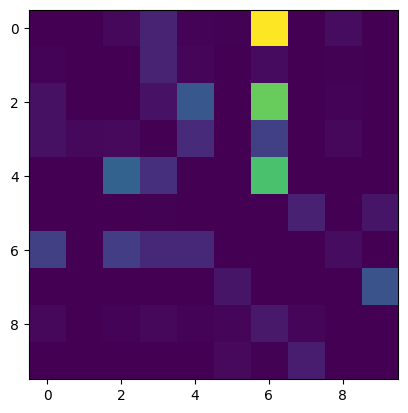

In [15]:
confusion_error = confusion.copy()

for i in range(10):
	confusion_error[i][i] = 0

plt.imshow(confusion_error)

**[과제3] 신경망이 가장 많이 착각한 패션 아이템 조합이 무엇인지 출력하는 코드를 작성하시오. 첫 25개를 5$\times$5 모아찍기로 출력하시오.**

Tshirt/top->Shirt


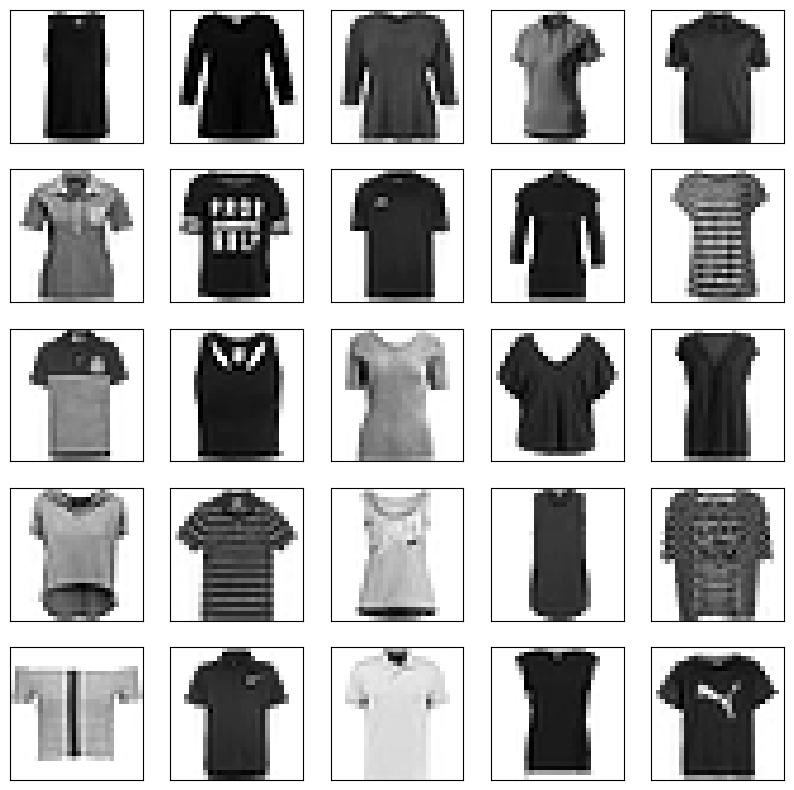

In [17]:
true = np.argmax(confusion_error) // 10 
answer = np.argmax(confusion_error)%10
print(str(class_names[true] + '->' + str(class_names[answer])))

idx = []

for i in range(len(test_images)):
	if test_labels[i] == true and np.argmax(predictions[i])==answer:
		idx.append(i)

plt.figure(figsize=(10,10))
for i in range(25):
	plt.subplot(5, 5, i+1)
	plt.xticks([])
	plt.yticks([])
	plt.imshow(test_images[idx[i]].reshape(28, 28), cmap=plt.cm.binary)

# CIFAR10 데이터셋

케라스에 빌트인 되어 있는 CIFAR10 데이터를 불러오겠습니다.

In [48]:
from keras.datasets import cifar100

(train_images, train_labels), (test_images, test_labels) = cifar100.load_data()

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


첫번째 훈련 데이터입니다.  
MNIST나 Fashion MNIST와는 달리 어떤 이미지인지 식별이 안되네요.  
3차원 텐서이고 안은 3차원 벡터들로 채워져 있습니다.

In [19]:
print(train_images[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


`plt.imshow`를 사용해서 이미지로 보죠.  
개구리 컬러 이미지네요.

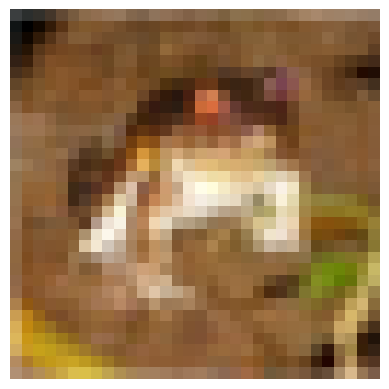

In [20]:
import matplotlib.pyplot as plt

plt.axis("off")
plt.imshow(train_images[0])
plt.show()

라벨은 6입니다.

In [21]:
print(train_labels[0])

[6]


0부터 9까지의 라벨은 다음과 같이 대응합니다.

In [22]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'sheep', 'truck']

CIFAR10은 32$\times$32 해상도의 컬러사진 훈련용 50,000장, 테스트 10,000장입니다.  
3은 RGB 채널입니다.  
위에서 출력한 3차원 벡터는 컬러 화소에 대한 정보를 담고 있습니다.  
밑바닥부터 시작하는 딥러닝에서는 C$\times$H$\times$W 포맷을 따랐는데 케라스는 H$\times$W$\times$C 포맷을 따릅니다.  
파이토치는 C$\times$H$\times$W 포맷을 따르고 `plt.imshow`는 H$\times$W$\times$C 포맷을 따릅니다.  
![](https://drive.google.com/thumbnail?id=1MZsJm_asjnSfYcesgi8hznJ7WvUVEhzT&sz=s4000)  
라벨은 위에서 출력한 바와 같이 브라켓이 씌워져 있어서 1이 뒤에 붙습니다.

In [23]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


훈련 데이터의 앞 25장을 5$\times$5 모아찍기로 출력해 보겠습니다.

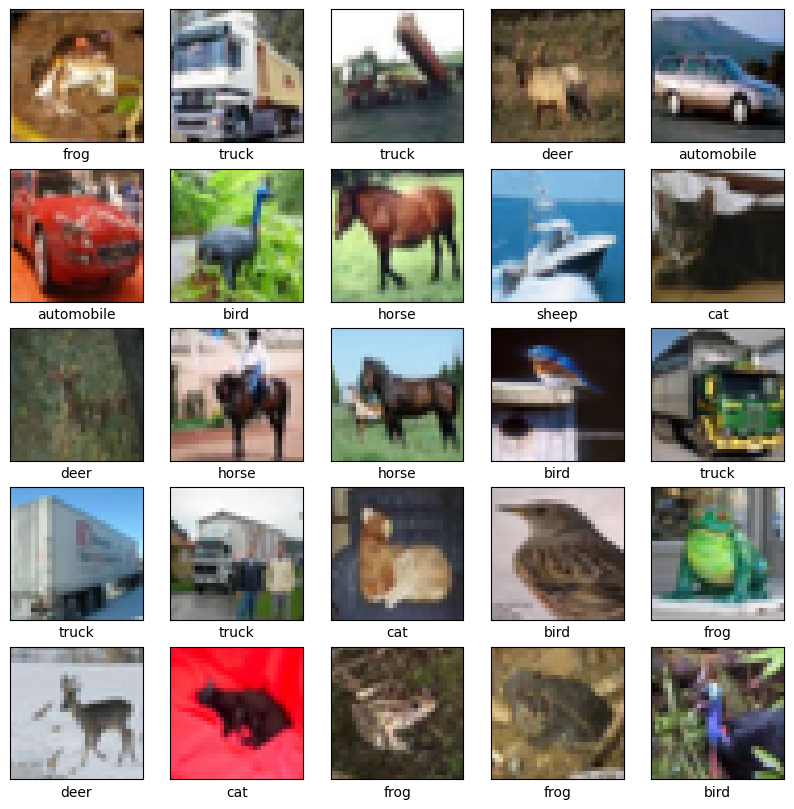

In [24]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

학습을 위해 각 데이터를 flatten하고 0과 1사이로 리스케일링해줍시다.

In [25]:
train_images = train_images.reshape((50000, 32 * 32 * 3))
train_images = train_images / 255
test_images = test_images.reshape((10000, 32 * 32 * 3))
test_images = test_images / 255

해상도가 다르고 컬러사진이기 때문에 MNIST와 Fasion MNIST에서 사용했던 신경망을 그대로 사용할 수는 없습니다.  
입력 뉴런의 수를 입력 데이터의 차원으로 수정해 줍시다.  
데이터가 복잡하니 학습회수도 늘려주겠습니다.  
정확도가 낮네요.  
나중에 CNN을 사용하면 많은 성능향상을 얻을 수 있습니다.

In [26]:
model = keras.Sequential([
    layers.Dense(512, input_shape=(32 * 32 * 3,), activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="RMSprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.fit(train_images, train_labels, epochs=15, batch_size=128)

test_loss, test_acc = model.evaluate(test_images, test_labels)

print("\n")
print(f"test_acc: {test_acc}")

/Users/vin_ah/miniconda3/envs/new_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.2009 - loss: 3.2090
Epoch 2/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3453 - loss: 1.8320
Epoch 3/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3830 - loss: 1.7210
Epoch 4/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4130 - loss: 1.6616
Epoch 5/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4252 - loss: 1.6175
Epoch 6/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4355 - loss: 1.5812
Epoch 7/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4491 - loss: 1.5539
Epoch 8/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4554 - loss: 1.5394
Epoch 9/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4574 - loss: 1.5242
Epoch 10/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4706 - loss: 1.4976
Epoch 11/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4726 - loss: 1.4863
Epoch 12/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step

# CIFAR100 데이터셋

**[실습1] (10분) (i) CIFAR100 데이터를 불러오시오.**

In [30]:
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data()

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'sheep', 'truck']

**(ii) shape을 출력하시오.**

In [31]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


**(iii) 훈련 데이터의 앞 25장을 5$\times$5 모아찍기로 출력해 보시오.**

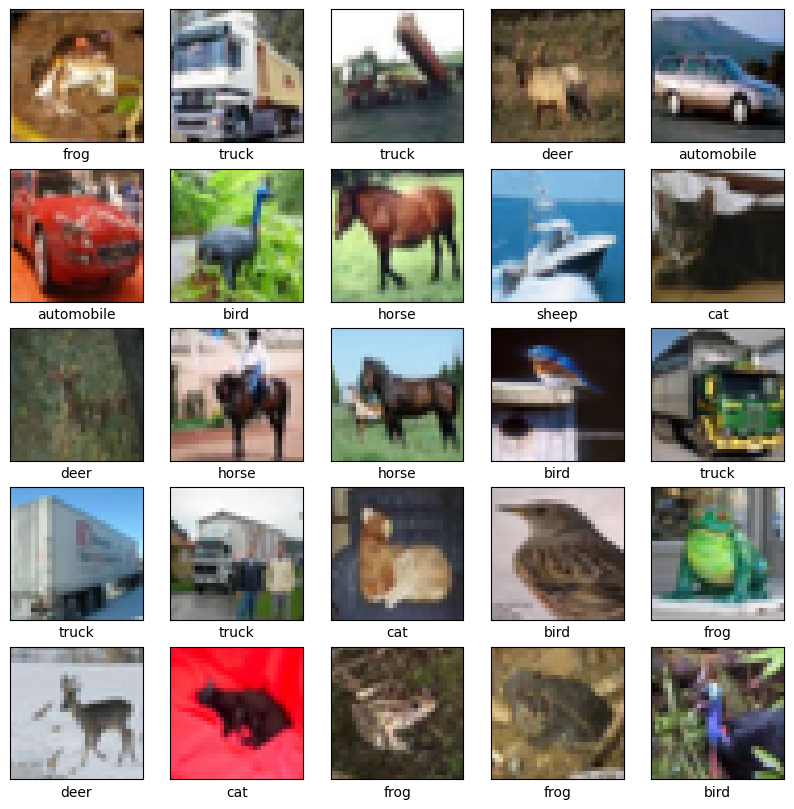

In [32]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

**(iii) 데이터를 flatten하고 0과 1사이로 리스케일링해주시오.**

In [33]:
train_images = train_images.reshape((50000, 32 * 32 * 3))
train_images = train_images / 255
test_images = test_images.reshape((10000, 32 * 32 * 3))
test_images = test_images / 255

**(iv) 신경망을 구성한후 학습시키고 평가하시오.**

In [38]:
vin_model = keras.Sequential([
	layers.Dense(98, input_shape=(32 * 32 * 3,), activation="relu"),
	layers.Dense(10, activation="relu"),
	layers.Dense(27, activation="softmax")
])



vin_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"],
			  )

vin_model.fit(train_images, train_labels, epochs=500, batch_size=512)

/Users/vin_ah/miniconda3/envs/new_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/500
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1340 - loss: 3.1183
Epoch 2/500
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2073 - loss: 2.8575
Epoch 3/500
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2399 - loss: 2.6416
Epoch 4/500
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2654 - loss: 2.4831
Epoch 5/500
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2809 - loss: 2.3461
Epoch 6/500
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2901 - loss: 2.2401
Epoch 7/500
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3180 - loss: 2.1150
Epoch 8/500
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3364 - loss: 1.9936
Epoch 9/500
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3545 - loss: 1.8806
Epoch 10/500
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3731 - loss: 1.8094
Epoch 11/500
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3811 - loss: 1.7775
Epoch 12/500
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy:

In [39]:

test_loss, test_acc = vin_model.evaluate(test_images, test_labels)

print("\n")
print(f"test_acc: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - accuracy: 0.5044 - loss: 1.4877


test_acc: 0.5012000203132629


In [42]:
vin_model = keras.Sequential([
	layers.Dense(98, input_shape=(32 * 32 * 3,), activation="relu"),
	layers.Dense(10, activation="relu"),
	layers.Dense(27, activation="softmax")
])



vin_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"],
			  )

vin_model.fit(train_images, train_labels, epochs=500, batch_size=512)

Epoch 1/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0195 - loss: 3.2518
Epoch 2/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0510 - loss: 3.1371
Epoch 3/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0670 - loss: 3.0856
Epoch 4/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0701 - loss: 3.0491
Epoch 5/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0770 - loss: 3.0039
Epoch 6/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0829 - loss: 2.9604
Epoch 7/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0932 - loss: 2.9025
Epoch 8/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1211 - loss: 2.8448
Epoch 9/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1629 - loss: 2.7856
Epoch 10/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1930 - loss: 2.7070
Epoch 11/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2136 - loss: 2.6462
Epoch 12/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy:

In [43]:

test_loss, test_acc = vin_model.evaluate(test_images, test_labels)

print("\n")
print(f"test_acc: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - accuracy: 0.4767 - loss: 1.4899


test_acc: 0.4715999960899353


In [49]:
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data()

# class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'sheep', 'truck']

In [57]:
len(train_images)

50000

In [58]:
len(test_images)

10000

In [ ]:
from sklearn.model_selection import train_test_split


train_images, test_images, train_labels, test_labels = () 

In [50]:
train_images = train_images.reshape((50000, 32 * 32 * 3))
train_images = train_images / 255
test_images = test_images.reshape((10000, 32 * 32 * 3))
test_images = test_images / 255

In [53]:
vin_model = keras.Sequential([
	layers.Dense(98, input_shape=(32 * 32 * 3,), activation="relu"),
	layers.Dense(10, activation="relu"),
	layers.Dense(100, activation="softmax")
])



vin_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"],
			  )

vin_model.fit(train_images, train_labels, epochs=1000, batch_size=512)

Epoch 1/1000
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0099 - loss: 4.6028
Epoch 2/1000
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0152 - loss: 4.5818
Epoch 3/1000
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0200 - loss: 4.5564
Epoch 4/1000
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0242 - loss: 4.5329
Epoch 5/1000
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0261 - loss: 4.5021
Epoch 6/1000
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0292 - loss: 4.4738
Epoch 7/1000
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0364 - loss: 4.4306
Epoch 8/1000
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0388 - loss: 4.3956
Epoch 9/1000
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0455 - loss: 4.3502
Epoch 10/1000
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0507 - loss: 4.3191
Epoch 11/1000
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0526 - loss: 4.2773
Epoch 12/1000
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

In [54]:

test_loss, test_acc = vin_model.evaluate(test_images, test_labels)

print("\n")
print(f"test_acc: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step - accuracy: 0.1843 - loss: 3.6778


test_acc: 0.18039999902248383


In [55]:
vin_model = keras.Sequential([
	layers.Dense(256, input_shape=(32 * 32 * 3,), activation="relu"),
	layers.Dense(512, activation="relu"),
	layers.Dense(100, activation="softmax")
])



vin_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"],
			  )

vin_model.fit(train_images, train_labels, epochs=1000, batch_size=512)

Epoch 1/1000
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.0246 - loss: 4.5508
Epoch 2/1000
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.0825 - loss: 4.1209
Epoch 3/1000
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.1123 - loss: 3.9144
Epoch 4/1000
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.1334 - loss: 3.8046
Epoch 5/1000
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.1488 - loss: 3.7109
Epoch 6/1000
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.1614 - loss: 3.6428
Epoch 7/1000
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.1717 - loss: 3.5873
Epoch 8/1000
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.1756 - loss: 3.5447
Epoch 9/1000
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.1836 - loss: 3.5024
Epoch 10/1000
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.1943 - loss: 3.4487
Epoch 11/1000
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.1962 - loss: 3.4287
Epoch 12/1000
98/98 ━━━━━━━━━━━━━━━━━━━━ 

In [56]:

test_loss, test_acc = vin_model.evaluate(test_images, test_labels)

print("\n")
print(f"test_acc: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 723us/step - accuracy: 0.2323 - loss: 10.0524


test_acc: 0.22990000247955322
